In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**EDA**

In [27]:

column_list = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
df = pd.read_csv("../data/2023w2.csv")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4616\3898023159.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=100, ax = ax, layout=(3,3), column=['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'])


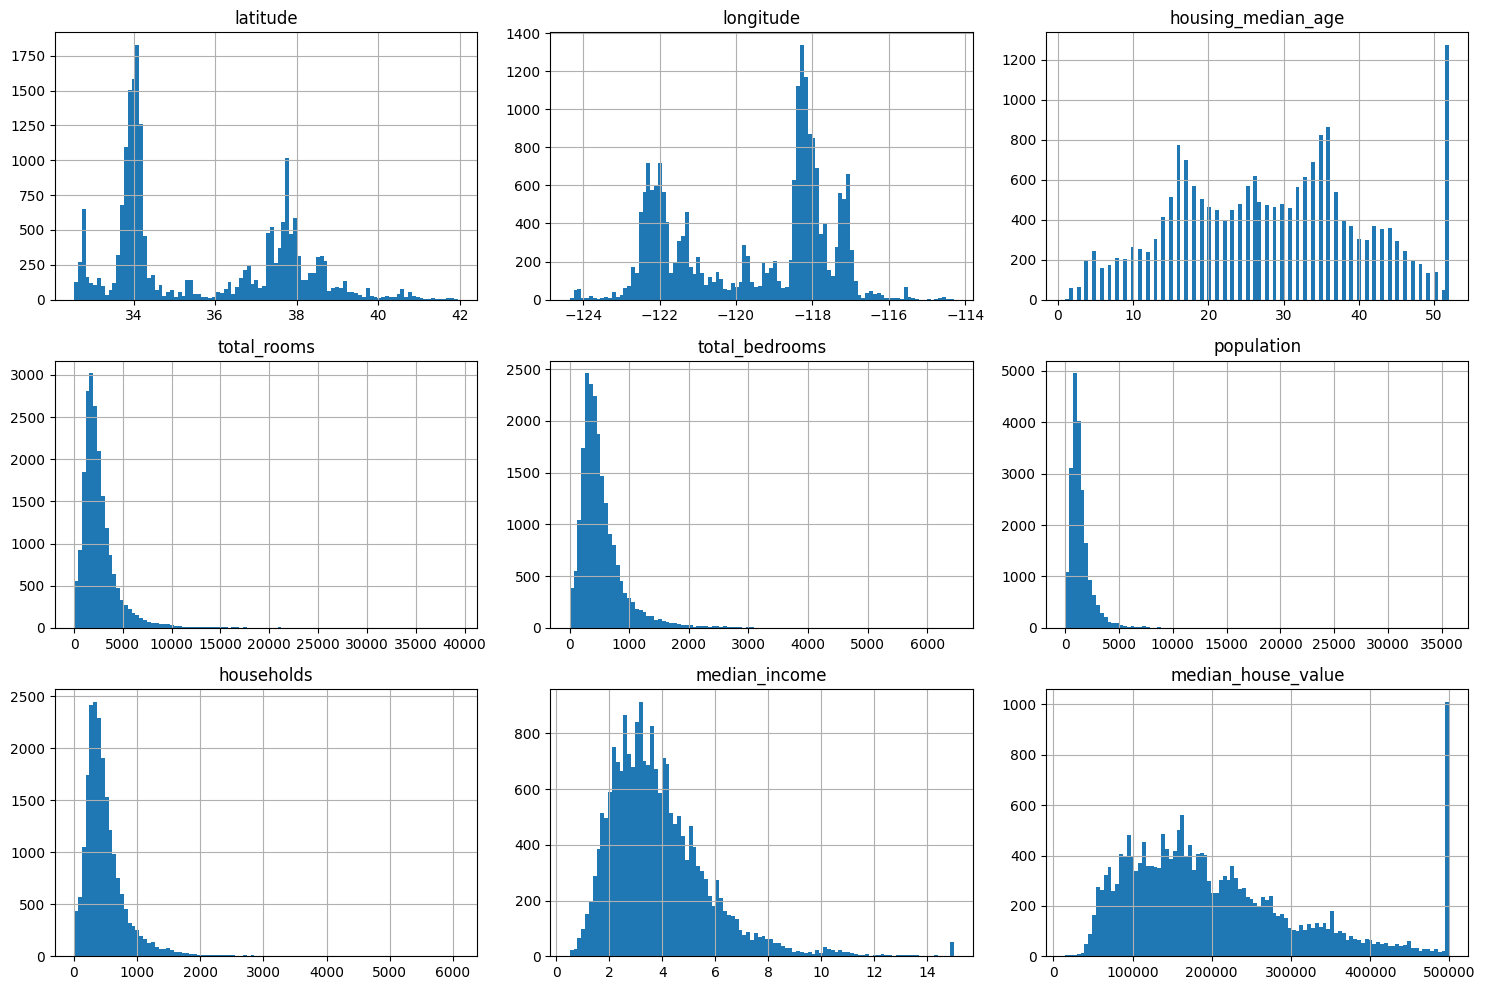

In [29]:
fig = plt.figure(figsize=(15, 10))
ax = plt.gca()

df.hist(bins=100, ax = ax, layout=(3,3), column=['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'])

plt.tight_layout()
plt.show()

In [30]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [31]:
df = df[df['ocean_proximity'].isin(['NEAR BAY', '<1H OCEAN'])]

In [34]:
df.shape

(11426, 9)

In [33]:
df = df[column_list]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4616\2548506570.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.median_house_value)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py

<Axes: xlabel='median_house_value', ylabel='Density'>

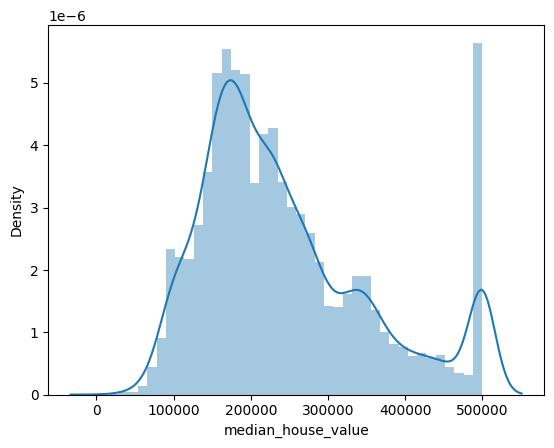

In [52]:
sns.distplot(df.median_house_value)

**Question 1**<br>
There's one feature with missing values. What is it?<br>
**Answer : total_bedrooms**

In [36]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        122
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

**Question 2**<br>
What's the median (50% percentile) for variable 'population'?<br>
**Answer: t**

In [44]:
df.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
latitude,11426.0,35.210034,1.846841,32.6100,32.6100,33.710,33.91000,34.1000,37.39000,37.87000,38.060000,38.640,41.8800
longitude,11426.0,-119.531785,1.972224,-124.1400,-124.1400,-122.320,-122.00000,-118.3600,-118.10000,-117.85000,-117.302500,-116.960,-116.6200
housing_median_age,11426.0,30.972956,12.413216,2.0000,2.0000,15.000,21.00000,32.0000,40.00000,49.00000,52.000000,52.000,52.0000
total_rooms,11426.0,2601.336163,2099.166960,8.0000,8.0000,985.000,1460.25000,2104.0000,3113.75000,4535.50000,6009.000000,10230.500,37937.0000
total_bedrooms,11304.0,540.041578,416.738694,1.0000,1.0000,209.000,300.00000,435.0000,648.00000,967.70000,1268.000000,2165.880,6445.0000
population,11426.0,1462.174077,1138.019195,3.0000,3.0000,568.000,826.00000,1200.0000,1773.00000,2601.00000,3293.500000,5429.500,35682.0000
households,11426.0,511.906967,384.451357,1.0000,1.0000,204.000,290.00000,417.0000,614.00000,911.00000,1185.000000,2001.500,6082.0000
median_income,11426.0,4.219098,2.004527,0.4999,0.4999,2.125,2.85725,3.8672,5.16125,6.62515,7.853575,11.111,15.0001
median_house_value,11426.0,243917.926308,109935.260964,17500.0000,17500.0000,126250.000,163800.00000,218000.0000,300300.00000,420800.00000,500001.000000,500001.000,500001.0000


In [45]:
df.population.median()

1200.0

In [38]:
np.median(df['population'])

1200.0

**Dataset Preperation**

In [39]:
#Shuffle the data
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [40]:
# Splitting the data
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [41]:
# Preparing the dataset
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train: n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [42]:
# Prepare the labels
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [43]:
# Delete labels from dataset
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [47]:
# FUNCTION FOR LINEAR REGRESSION:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [54]:
# function for RMSE Value:
def rmse(y , y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [49]:
# Fill NA values

col_list=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]

def prepare_X(df , fillna_values):
    df_num = df[col_list]
    df_num = df_num.fillna(fillna_values)
    X = df_num.values
    return X

In [50]:
# Fill TRAIN missing values with zero
X_null_train = prepare_X(df_train, fillna_values=0)
w_0_null , w_null = train_linear_regression(X_null_train, y_train)
print(f"w_0_null : {w_0_null} , w_null : {w_null}")

In [53]:
# Prepare Validation data with train results
X_null_val = prepare_X(df_val, fillna_values=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

In [55]:
# RMSE Score for 0
np.round(rmse(y_val, y_null_pred_val), 2)

0.32

In [56]:
# Fill TRAIN missing values with mean
mean = df_train.total_bedrooms.mean()

X_mean_train = prepare_X(df_train, fillna_values=mean)
w_0_mean , w_mean = train_linear_regression(X_mean_train, y_train)
print(f"w_0_mean : {w_0_mean} , w_mean : {w_mean}")

w_0_mean : -10.520352278852808 , w_mean : [-2.68616651e-01 -2.87055874e-01  4.03722241e-03 -2.29637223e-05
 -2.69657890e-05 -2.06053819e-04  8.38759817e-04  1.53740372e-01]


In [57]:
# Prepare Validation data with train results
X_mean_val = prepare_X(df_val, fillna_values=0)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [58]:
# RMSE Score for 0
np.round(rmse(y_val, y_mean_pred_val), 2)

0.32

Answer for question 3: **Both are equally good**

**Question 4**<br>
- Now let's train a regularized linear regression.<br>
- For this question, fill the NAs with 0.<br>
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].<br>
- Use RMSE to evaluate the model on the validation dataset.<br>
- Round the RMSE scores to 2 decimal digits.<br>
- Which r gives the best RMSE?<br>

**REGULARIZATION:**

In [59]:
# Model For Train Linear Regression Regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r* np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [60]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0 , w = train_linear_regression_reg(X_null_train, y_train, r = r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val), 2)
    print(r, w_0, rmse_val)

0 -10.523592118319398 0.32
1e-06 -10.523435856648906 0.32
0.0001 -10.507988945332976 0.32
0.001 -10.369614382346704 0.32
0.01 -9.162931585699972 0.32
0.1 -4.233743648861143 0.32
1 -0.6608092252311525 0.32
5 -0.13632452035498094 0.32
10 -0.06681672496035204 0.32


**Answer for question 4 is 0**

**Question 5**<br>
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.<br>
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].<br>
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.<br>
- Fill the missing values with 0 and train a model without regularization.<br>
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.<br>
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.<br>
- Round the result to 3 decimal digits (round(std, 3))<br>

In [63]:
# Perform training with differenct seed values

rmse_list = []

for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n) #len of dataframe
    np.random.seed(r)
    np.random.shuffle(idx)
    
    #shuffle complete dataset
    df_shuffled = df.iloc[idx]

    #Split data into train/val/split in 60/20/20
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    # Reset index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # Seprate Label
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    # Apply np.log1p on original labels values
    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)

    # Remove labels from train/val/test
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    # Perform training with 0 fillna_value
    X_null_train = prepare_X(df_train, fillna_values=0)
    w_0, w = train_linear_regression(X_null_train, y_train)

    # Calculate RMSE value
    X_null_val = prepare_X(df_val, fillna_values=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val, y_null_reg_val), 2)

    # Append into rmse list:
    rmse_list.append(rmse_val)

    print(r, w_0, rmse_val)

print(f"rmse_list : {rmse_list}")

0 -10.830353992137251 0.3
1 -9.615813236023673 0.3
2 -10.843722784929415 0.31
3 -11.442706904465062 0.33
4 -9.654442089374921 0.31
5 -10.920520389513444 0.31
6 -9.511358245647695 0.31
7 -10.01962572962242 0.31
8 -10.64279836240136 0.3
9 -10.640825544351745 0.31
rmse_list : [0.3, 0.3, 0.31, 0.33, 0.31, 0.31, 0.31, 0.31, 0.3, 0.31]


In [64]:
np.round(np.std(rmse_list), 3)

0.008

- Answer for Question 5 is 0.008.

**Question 6**<br>
- Split the dataset like previously, use seed 9.<br>
- Combine train and validation datasets.<br>
- Fill the missing values with 0 and train a model with r=0.001.<br>
- What's the RMSE on the test dataset?<br>

In [71]:
r = 9

idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

#shuffle complete dataset
df_shuffled = df.iloc[idx]

#Split data into train/val/split in 60/20/20
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Merge Train and Val dataset
frames = [df_train, df_val]
df_train_val = pd.concat(frames)

# Reset index
df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Create Labels:
y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

# apply logs on original labels:
y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

#Remove labels
del df_train_val['median_house_value']
del df_test['median_house_value']

In [73]:
# perform model training:
X_null_train_val = prepare_X(df_train_val, fillna_values=0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

In [74]:
# Calculate RMSE:
X_null_test = prepare_X(df_test, fillna_values=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)

np.round(rmse(y_test, y_null_pred_test), 2)

0.31

- Answer for Question 6 is 0.31.